# Airbnb in London EDA

Due to the size of the Data Analysis - Final, we were having difficulty loading the data. Therefore, we are using a separate notebook for the EDA, although some of the working has been done in the Data Analysis - Final notebook.

# Contents

- [Exploratory Data Analysis](#eda)
    - [1.	How are Airbnb prices in London distributed by borough?](#q1)
    - [2.	How are Airbnb prices in London distributed by room type?](#q2)
    - [3.	For listings that did not get any bookings, what does their price distribution look like?](#q3)
    - [4.	Could pricing be the reason for the above listings not getting any booking?](#q4)
    - [5.	What is a good machine learning model for predicting the price of an Airbnb listing? ](#q5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data:
raw_listings = pd.read_csv('06 Nov 2020 listings.csv') # (76984, 74)

# Exploratory Data Analysis <a class="anchor" id="eda"></a>

# 1. How are Airbnb prices in London distributed by borough?<a class="anchor" id="q1"></a>

In [4]:
# Lambda function to remove special characters and convert to float
strip_and_convert = lambda col: col.str.extract('(\d+)', expand=False).astype(float, errors='ignore')

#We also want to look at the full picture of price by using the orginal dataset without removal of outliers
#We created a copy for with the features we think we need for our analysis 
df_1 = raw_listings[['id','property_type', 'price', 'neighbourhood_cleansed', 'room_type', 'accommodates', 'bedrooms', 'beds', 'last_review', 'first_review']].copy()
df_1[['price']] = df_1[['price']].apply(strip_and_convert)
df_1

,id,property_type,price,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,last_review,first_review
0,11551,Entire apartment,97.0,Lambeth,Entire home/apt,4,1.0,3.0,26/03/2020,21/03/2010
1,13913,Private room in apartment,40.0,Islington,Private room,2,1.0,0.0,22/02/2020,18/08/2010
2,15400,Entire apartment,75.0,Kensington and Chelsea,Entire home/apt,2,1.0,1.0,16/03/2020,21/12/2009
3,17402,Entire apartment,307.0,Westminster,Entire home/apt,6,3.0,3.0,02/11/2019,21/03/2011
4,17506,Private room in bed and breakfast,150.0,Hammersmith and Fulham,Private room,2,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
76979,46259322,Entire apartment,90.0,Westminster,Entire home/apt,2,1.0,1.0,NaN,NaN
76980,46259459,Private room in apartment,87.0,Westminster,Private room,2,1.0,2.0,NaN,NaN
76981,46259503,Private room in house,26.0,Redbridge,Private room,2,1.0,1.0,NaN,NaN
76982,46259530,Private room in apartment,59.0,Hammersmith and Fulham,Private room,2,1.0,NaN,NaN,NaN


In [5]:
#w/o removing outliers
print("Average Price for All London:")
print(round(df_1.price.mean(),2))

Average Price for All London:
100.05


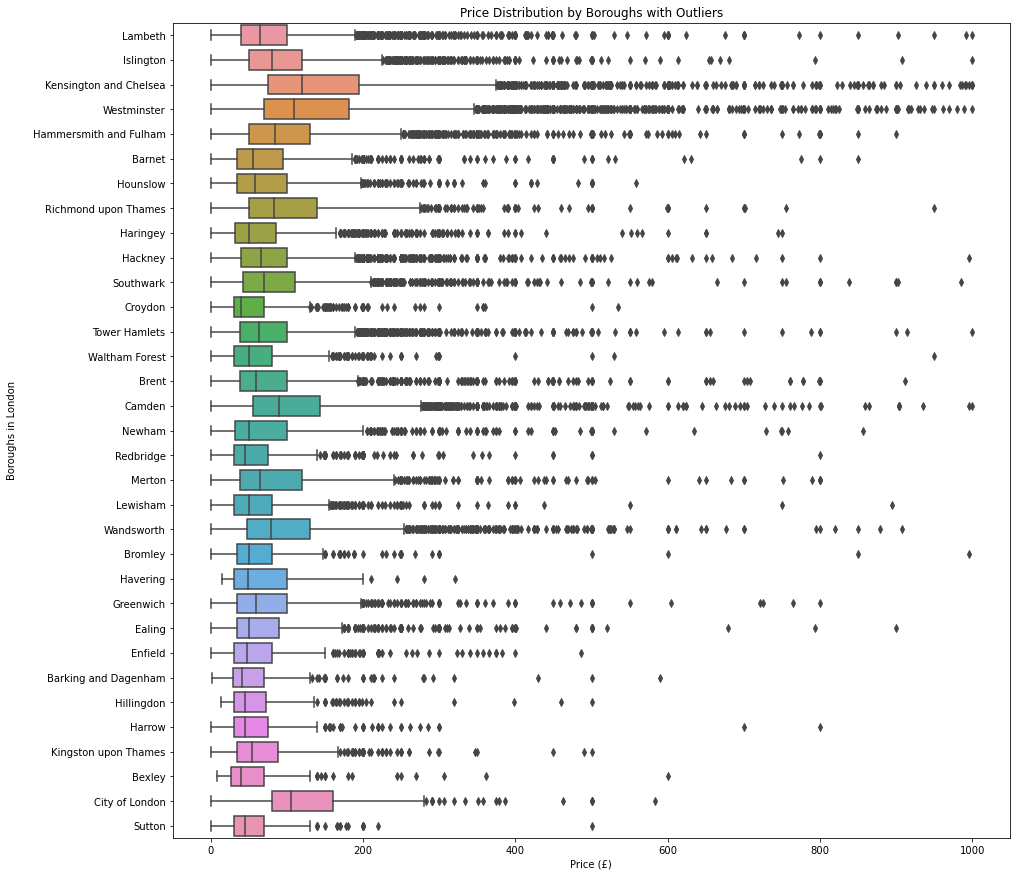

In [53]:
# Plot price Distribution by Borough
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(x='price', y='neighbourhood_cleansed',  
            data=df_1, orient='h', ax=ax).set(xlabel='Price (£)\n', ylabel='Boroughs in London\n')
ax.set_title('Price Distribution by Boroughs with Outliers')
plt.show()

In [7]:
#Let's look at listing with prices 4x std deviation as they were termed as our outliers.

df_1_high = df_1[df_1.price>378]
df_1_high #there are 869 listings.

,id,property_type,price,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,last_review,first_review
63,75120,Entire apartment,414.0,Hammersmith and Fulham,Entire home/apt,10,4.0,9.0,15/02/2020,14/08/2012
132,109226,Entire house,423.0,Islington,Entire home/apt,4,2.0,3.0,08/12/2014,09/09/2013
223,244125,Entire apartment,450.0,Hackney,Entire home/apt,12,4.0,5.0,09/02/2020,27/02/2013
276,279022,Entire house,950.0,Westminster,Entire home/apt,6,3.0,2.0,NaN,NaN
291,290233,Entire house,572.0,Newham,Entire home/apt,6,3.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
76668,46117024,Entire apartment,400.0,Westminster,Entire home/apt,5,2.0,3.0,NaN,NaN
76744,46148250,Entire townhouse,790.0,Kensington and Chelsea,Entire home/apt,8,4.0,5.0,NaN,NaN
76805,46173563,Entire apartment,449.0,Camden,Entire home/apt,2,1.0,1.0,NaN,NaN
76924,46230846,Entire apartment,926.0,Kensington and Chelsea,Entire home/apt,6,3.0,3.0,NaN,NaN


In [9]:
borough_price = df_1_high.groupby("neighbourhood_cleansed").price.mean().sort_values(ascending=False)
borough_price = borough_price.reset_index()
borough_price.head(50)

,neighbourhood_cleansed,price
0,Harrow,750.000000
1,Bromley,736.250000
2,Bexley,600.000000
3,Waltham Forest,595.000000
4,Southwark,555.704545
5,Kensington and Chelsea,548.997110
6,Lewisham,546.000000
7,Camden,544.295082
8,Westminster,538.903491
9,Haringey,535.600000


In [10]:
borough_count = df_1_high.groupby("neighbourhood_cleansed").id.count().sort_values(ascending=False)
borough_count = borough_count.reset_index()
borough_count.rename(columns={"id":"count"}, inplace=True)
borough_count["percentage"]=round(borough_count["count"]/borough_count["count"].sum()*100,2)
borough_count.head(80)

,neighbourhood_cleansed,count,percentage
0,Westminster,487,28.88
1,Kensington and Chelsea,346,20.52
2,Camden,122,7.24
3,Wandsworth,90,5.34
4,Hammersmith and Fulham,79,4.69
5,Lambeth,66,3.91
6,Tower Hamlets,60,3.56
7,Brent,58,3.44
8,Islington,52,3.08
9,Hackney,50,2.97


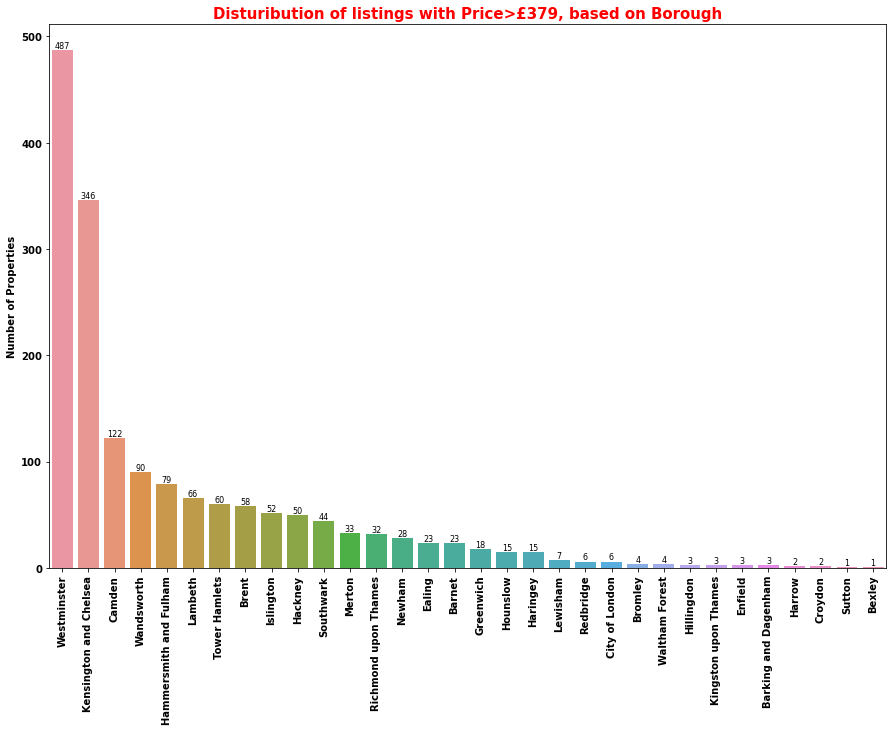

In [11]:
#Barplot of Borough 

plt.figure(figsize=(15,10)),

ax = sns.barplot(x="neighbourhood_cleansed", y="count", data=borough_count)
plt.title("Disturibution of listings with Price>£379, based on Borough", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of Properties",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=8)

plt.show()

There are 12 Inner London boroughs which are Camden, Greenwich, Hackney, Hammersmith and Fulham, Islington, Kensington and Chelsea, Lambeth, Lewisham, Southwark, Tower Hamlets, Wandsworth and Westminster. 13 including City of London.

We can see that most of the high end listings are in Westminster and Kensington and Chelsea.  Among the top 10, all except Brent are in inner London.

This is inline with our expectations.

Note that we see a lot of NAN in the first and last reviews for these listings

Now let us look at the other spectrum. We will take anything lower than mean price - std price as lower end.

with outliers: 100.05 - 94.80 = 5.25
without outliers, i.e. listings: 90.40 - 66.42 = 23.98 (can be found in the data analysis - final notebook)

In [12]:
#with outliers
df_1.describe() 

,id,price,accommodates,bedrooms,beds
count,7.698400e+04,76984.000000,76984.000000,72238.000000,75904.000000
mean,2.562503e+07,100.047971,3.077393,1.487818,1.706814
std,1.319053e+07,94.793524,1.947671,0.884929,1.275783
min,1.155100e+04,0.000000,1.000000,1.000000,0.000000
25%,1.509091e+07,42.000000,2.000000,1.000000,1.000000
50%,2.585057e+07,74.000000,2.000000,1.000000,1.000000
75%,3.760606e+07,120.000000,4.000000,2.000000,2.000000
max,4.626152e+07,999.000000,16.000000,50.000000,50.000000


In [13]:
#Let's look at listing with prices 1x std deviation 

df_1_low = df_1[df_1.price<5.26]
df_1_low #there are 869 listings.

,id,property_type,price,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,last_review,first_review
139,127860,Private room in house,1.0,Richmond upon Thames,Private room,2,1.0,1.0,NaN,NaN
162,170524,Entire apartment,1.0,Westminster,Entire home/apt,6,3.0,1.0,NaN,NaN
625,429045,Entire house,1.0,Lewisham,Entire home/apt,6,3.0,3.0,NaN,NaN
769,473637,Entire house,2.0,Kensington and Chelsea,Entire home/apt,9,4.0,6.0,NaN,NaN
959,548429,Entire apartment,1.0,Southwark,Entire home/apt,4,2.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
74495,45444595,Entire apartment,1.0,Camden,Entire home/apt,2,1.0,1.0,NaN,NaN
75001,45589684,Private room in condominium,0.0,Hackney,Private room,1,1.0,1.0,NaN,NaN
75132,45646362,Private room in condominium,0.0,Tower Hamlets,Private room,1,1.0,1.0,NaN,NaN
76416,46060845,Private room in condominium,0.0,Hackney,Private room,1,1.0,1.0,NaN,NaN


In [14]:
borough_low_price = df_1_low.groupby("neighbourhood_cleansed").price.mean().sort_values(ascending=False)
borough_low_price = borough_low_price.reset_index()
borough_low_price.head(50)

,neighbourhood_cleansed,price
0,Haringey,2.600000
1,Lewisham,2.200000
2,Barking and Dagenham,2.000000
3,Kingston upon Thames,2.000000
4,Southwark,1.722222
5,Sutton,1.666667
6,Islington,1.571429
7,Newham,1.500000
8,Camden,1.423077
9,Westminster,1.252525


In [15]:
borough_low_count = df_1_low.groupby("neighbourhood_cleansed").id.count().sort_values(ascending=False)
borough_low_count = borough_low_count.reset_index()
borough_low_count.rename(columns={"id":"count"}, inplace=True)
borough_low_count["percentage"]=round(borough_low_count["count"]/borough_low_count["count"].sum()*100,2)
borough_low_count.head(80)

,neighbourhood_cleansed,count,percentage
0,Westminster,99,28.86
1,Kensington and Chelsea,54,15.74
2,Camden,26,7.58
3,Hammersmith and Fulham,25,7.29
4,Southwark,18,5.25
5,Tower Hamlets,15,4.37
6,Ealing,14,4.08
7,Hackney,13,3.79
8,Lewisham,10,2.92
9,Barnet,8,2.33


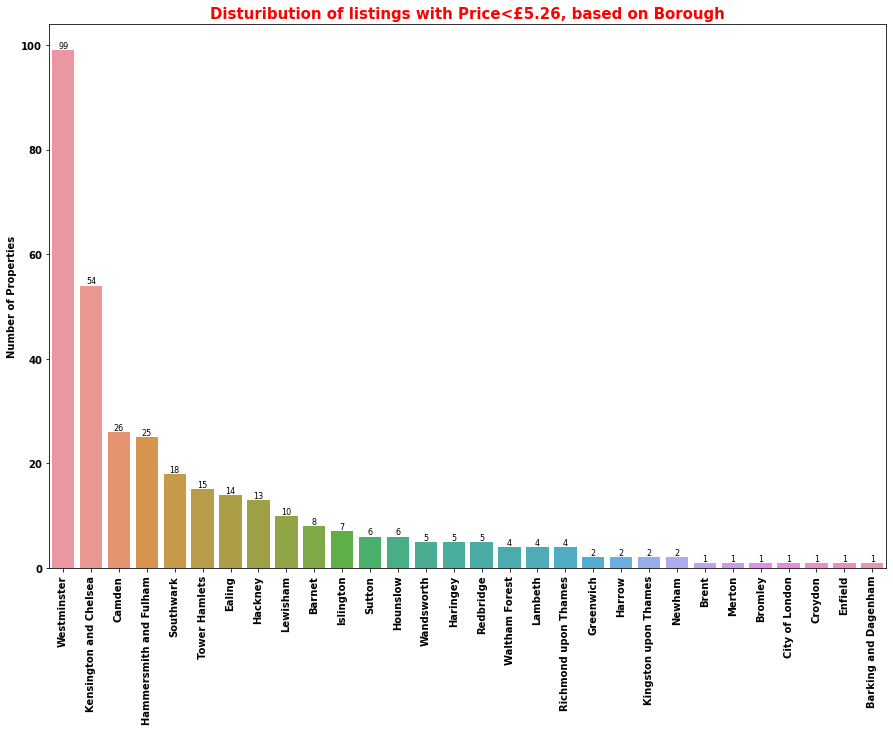

In [16]:
#Barplot of Borough 

plt.figure(figsize=(15,10)),

ax = sns.barplot(x="neighbourhood_cleansed", y="count", data=borough_low_count)
plt.title("Disturibution of listings with Price<£5.26, based on Borough", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of Properties",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=8)

plt.show()

This is interesting. Majority of the listings less than £5.26 are in Westminster and kensington and chelsea. And among the top 10, only Brent and Ealing are not in Inner London.

Noted that there's a lot of NAN in the first review and last review features. Need to look into it.

# 2. How are Airbnb prices in London distributed by room type?<a class="anchor" id="q2"></a>

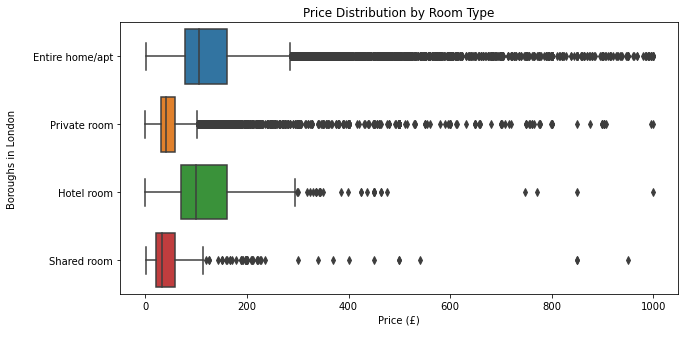

In [54]:
# Plot price Distribution by room type
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(x='price', y='room_type',  
            data=df_1, orient='h', ax=ax).set(xlabel='Price (£)\n', ylabel='Boroughs in London\n')
ax.set_title('Price Distribution by Room Type')
plt.show()

In [28]:
rm_type_price = df_1_high.groupby('room_type').price.mean().sort_values(ascending=False)
rm_type_price = rm_type_price.reset_index()
rm_type_price.head(50)

,room_type,price
0,Shared room,630.000000
1,Private room,547.990196
2,Entire home/apt,530.545330
3,Hotel room,530.055556


In [29]:
rm_count = df_1_high.groupby('room_type').id.count().sort_values(ascending=False)
rm_count = rm_count.reset_index()
rm_count.rename(columns={"id":"count"}, inplace=True)
rm_count["percentage"]=round(rm_count["count"]/rm_count["count"].sum()*100,2)
rm_count.head(80)

,room_type,count,percentage
0,Entire home/apt,1456,86.36
1,Private room,204,12.10
2,Hotel room,18,1.07
3,Shared room,8,0.47


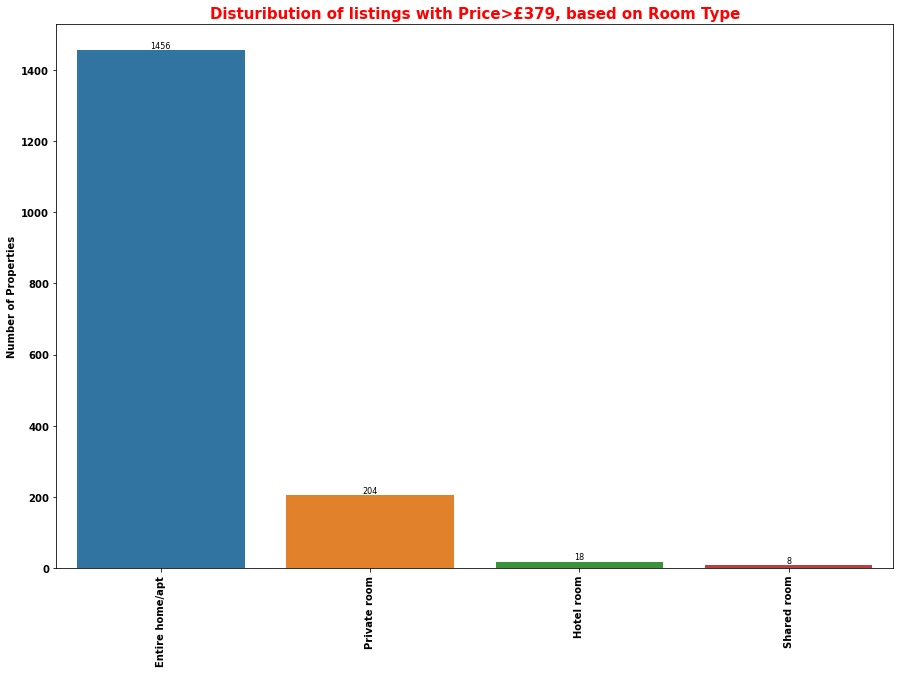

In [30]:
#Barplot of room types 

plt.figure(figsize=(15,10)),

ax = sns.barplot(x='room_type', y='count', data=rm_count)
plt.title("Disturibution of listings with Price>£379, based on Room Type", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of Properties",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=8)

plt.show()

In [24]:
rm_low_price = df_1_low.groupby("room_type").price.mean().sort_values(ascending=False)
rm_low_price = rm_low_price.reset_index()
rm_low_price.head(50)

,room_type,price
0,Entire home/apt,1.350000
1,Private room,1.218978
2,Shared room,1.000000
3,Hotel room,0.000000


In [25]:
rm_low_count = df_1_low.groupby("room_type").id.count().sort_values(ascending=False)
rm_low_count = borough_low_count.reset_index()
rm_low_count.rename(columns={"id":"count"}, inplace=True)
rm_low_count["percentage"]=round(rm_low_count["count"]/rm_low_count["count"].sum()*100,2)
rm_low_count.head(80)

,index,neighbourhood_cleansed,count,percentage
0,0,Westminster,99,28.86
1,1,Kensington and Chelsea,54,15.74
2,2,Camden,26,7.58
3,3,Hammersmith and Fulham,25,7.29
4,4,Southwark,18,5.25
5,5,Tower Hamlets,15,4.37
6,6,Ealing,14,4.08
7,7,Hackney,13,3.79
8,8,Lewisham,10,2.92
9,9,Barnet,8,2.33


As it was expected, Hotel Rooms and Entire Homes are the most expensive on average, followed by Private Rooms and Shared Rooms. Entire Homes contains 86.36% of the outliers in price.

# 3. For listings that did not get any bookings, what does their price distribution look like?<a class="anchor" id="q3"></a>

In [34]:
df_1_sorted = df_1.sort_values(by='price',ascending=False)
df_1_sorted #76984 listings

,id,property_type,price,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,last_review,first_review
32177,21965077,Entire apartment,999.0,Tower Hamlets,Entire home/apt,1,1.0,3.0,NaN,NaN
33037,22399546,Entire townhouse,999.0,Kensington and Chelsea,Entire home/apt,12,6.0,7.0,06/08/2020,07/01/2018
70573,43541085,Private room in apartment,999.0,Islington,Private room,6,NaN,12.0,NaN,NaN
17482,13905660,Entire townhouse,999.0,Westminster,Entire home/apt,16,8.0,19.0,10/09/2020,28/08/2016
38626,25932168,Room in boutique hotel,999.0,Kensington and Chelsea,Hotel room,2,1.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
76416,46060845,Private room in condominium,0.0,Hackney,Private room,1,1.0,1.0,NaN,NaN
75001,45589684,Private room in condominium,0.0,Hackney,Private room,1,1.0,1.0,NaN,NaN
67251,42065766,Room in serviced apartment,0.0,Kensington and Chelsea,Hotel room,4,NaN,NaN,NaN,NaN
73623,45148705,Private room in condominium,0.0,Tower Hamlets,Private room,1,1.0,1.0,NaN,NaN


In [33]:
#Checking for listings with no last reviews.
df_2 = df_1_sorted[df_1_sorted['last_review'].isna()]
df_2 #21733 rows 

,id,property_type,price,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,last_review,first_review
32177,21965077,Entire apartment,999.0,Tower Hamlets,Entire home/apt,1,1.0,3.0,NaN,NaN
70573,43541085,Private room in apartment,999.0,Islington,Private room,6,NaN,12.0,NaN,NaN
38626,25932168,Room in boutique hotel,999.0,Kensington and Chelsea,Hotel room,2,1.0,2.0,NaN,NaN
48481,32327505,Entire house,995.0,Kensington and Chelsea,Entire home/apt,8,4.0,4.0,NaN,NaN
41640,27775083,Entire serviced apartment,992.0,Kensington and Chelsea,Entire home/apt,7,3.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
76416,46060845,Private room in condominium,0.0,Hackney,Private room,1,1.0,1.0,NaN,NaN
75001,45589684,Private room in condominium,0.0,Hackney,Private room,1,1.0,1.0,NaN,NaN
67251,42065766,Room in serviced apartment,0.0,Kensington and Chelsea,Hotel room,4,NaN,NaN,NaN,NaN
73623,45148705,Private room in condominium,0.0,Tower Hamlets,Private room,1,1.0,1.0,NaN,NaN


In [35]:
#Checking for listings with no first reviews.
df_3 = df_1_sorted[df_1_sorted['first_review'].isna()]
df_3 #21733 rows

,id,property_type,price,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,last_review,first_review
32177,21965077,Entire apartment,999.0,Tower Hamlets,Entire home/apt,1,1.0,3.0,NaN,NaN
70573,43541085,Private room in apartment,999.0,Islington,Private room,6,NaN,12.0,NaN,NaN
38626,25932168,Room in boutique hotel,999.0,Kensington and Chelsea,Hotel room,2,1.0,2.0,NaN,NaN
48481,32327505,Entire house,995.0,Kensington and Chelsea,Entire home/apt,8,4.0,4.0,NaN,NaN
41640,27775083,Entire serviced apartment,992.0,Kensington and Chelsea,Entire home/apt,7,3.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
76416,46060845,Private room in condominium,0.0,Hackney,Private room,1,1.0,1.0,NaN,NaN
75001,45589684,Private room in condominium,0.0,Hackney,Private room,1,1.0,1.0,NaN,NaN
67251,42065766,Room in serviced apartment,0.0,Kensington and Chelsea,Hotel room,4,NaN,NaN,NaN,NaN
73623,45148705,Private room in condominium,0.0,Tower Hamlets,Private room,1,1.0,1.0,NaN,NaN


In [68]:
#mean price
print("Average Price for Listings without bookings:")
print(round(df_3.price.mean(),2))

Average Price for Listings without bookings:
113.96


In [69]:
df_3.describe()

,id,price,accommodates,bedrooms,beds
count,2.173300e+04,21733.000000,21733.000000,20225.000000,20934.000000
mean,3.059371e+07,113.960705,3.004187,1.522818,1.710137
std,1.377051e+07,117.768343,2.043546,1.000537,1.376574
min,1.750600e+04,0.000000,1.000000,1.000000,0.000000
25%,1.958332e+07,43.000000,2.000000,1.000000,1.000000
50%,3.563573e+07,75.000000,2.000000,1.000000,1.000000
75%,4.278202e+07,140.000000,4.000000,2.000000,2.000000
max,4.626152e+07,999.000000,16.000000,50.000000,50.000000


It looks like the listings without first reviews are the same as those without last review. It makes sense. So we will explore further based on the first review (df_3)

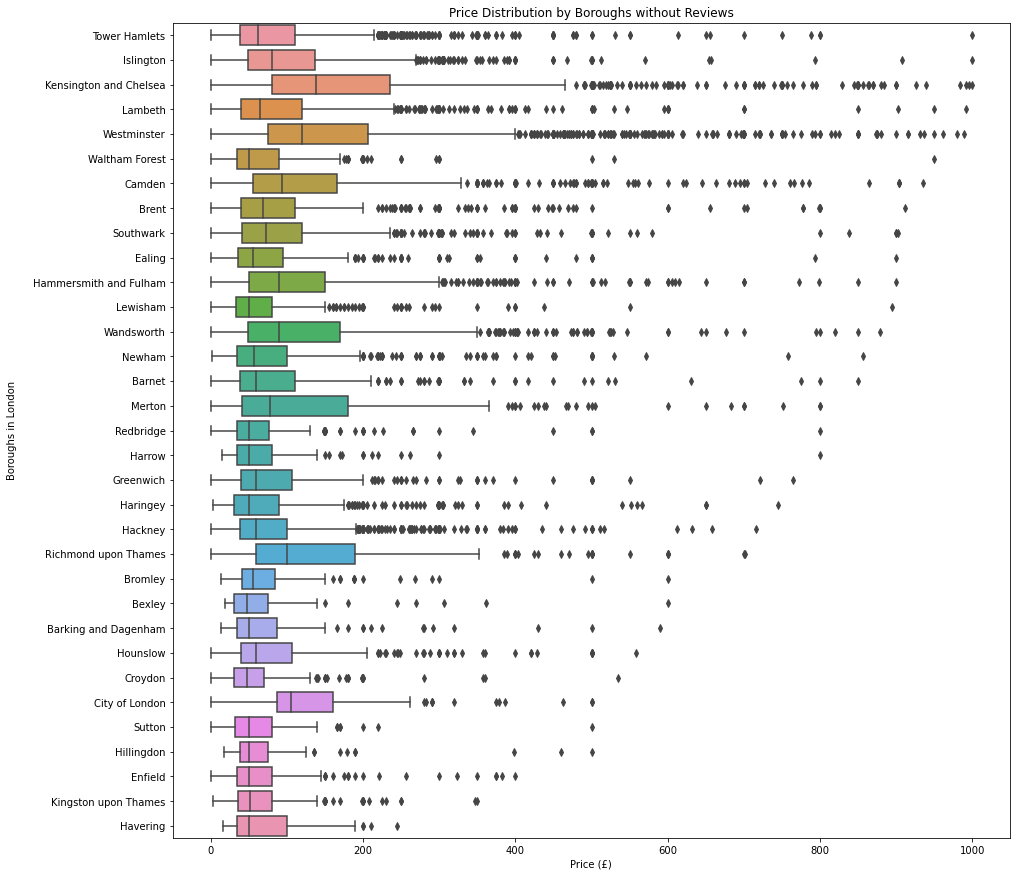

In [55]:
# Plot price Distribution by Borough
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(x='price', y='neighbourhood_cleansed',  
            data=df_3, orient='h', ax=ax).set(xlabel='Price (£)\n', ylabel='Boroughs in London\n')
ax.set_title('Price Distribution by Boroughs without Reviews')
plt.show()

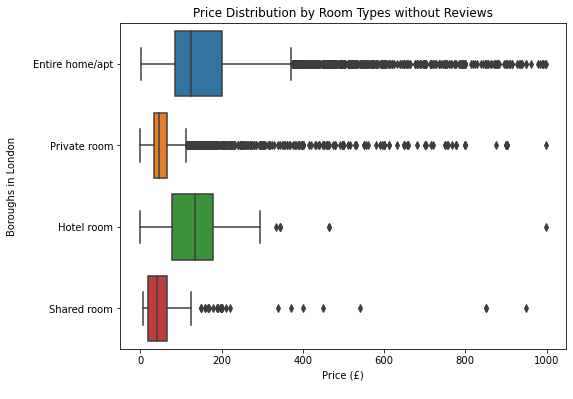

In [62]:
# Plot price Distribution by Borough
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='price', y='room_type',  
            data=df_3, orient='h', ax=ax).set(xlabel='Price (£)\n', ylabel='Boroughs in London\n')
ax.set_title('Price Distribution by Room Types without Reviews')
plt.show()

In [49]:
#Let's look at the price distribution of those without reviews.
borough__price = df_3.groupby("neighbourhood_cleansed").price.mean().sort_values(ascending=False)
borough__price = borough__price.reset_index()
borough__price.head(50)

,neighbourhood_cleansed,price
0,Kensington and Chelsea,187.278261
1,Westminster,168.356086
2,Richmond upon Thames,145.700348
3,City of London,134.190476
4,Camden,133.368538
5,Wandsworth,128.113174
6,Merton,127.603491
7,Hammersmith and Fulham,122.036496
8,Islington,109.572559
9,Brent,105.414747


In [50]:
borough__count = df_3.groupby("neighbourhood_cleansed").id.count().sort_values(ascending=False)
borough__count = borough__count.reset_index()
borough__count.rename(columns={"id":"count"}, inplace=True)
borough__count["percentage"]=round(borough__count["count"]/borough__count["count"].sum()*100,2)
borough__count.head(80)


,neighbourhood_cleansed,count,percentage
0,Westminster,2637,12.13
1,Tower Hamlets,1936,8.91
2,Kensington and Chelsea,1610,7.41
3,Hackney,1472,6.77
4,Camden,1354,6.23
5,Islington,1137,5.23
6,Wandsworth,1131,5.20
7,Lambeth,1068,4.91
8,Southwark,1063,4.89
9,Hammersmith and Fulham,959,4.41


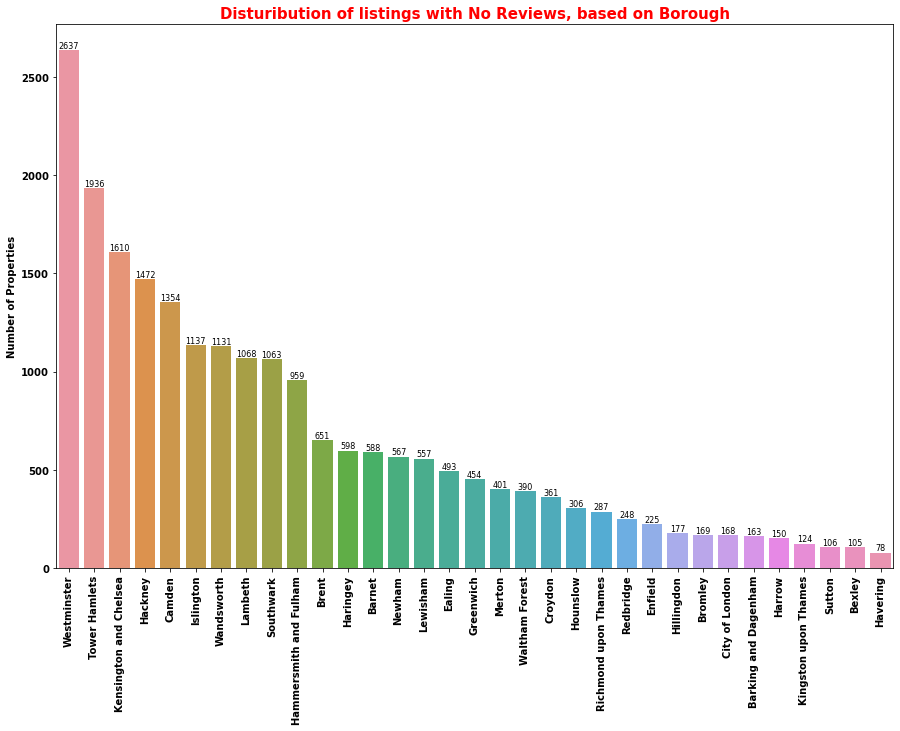

In [52]:
#Barplot of Borough 

plt.figure(figsize=(15,10)),

ax = sns.barplot(x="neighbourhood_cleansed", y="count", data=borough__count)
plt.title("Disturibution of listings with No Reviews, based on Borough", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of Properties",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=8)

plt.show()

In [63]:
#Let's look at the price distribution of those without reviews.
rm__price = df_3.groupby('room_type').price.mean().sort_values(ascending=False)
rm__price = rm__price.reset_index()
rm__price.head(50)

,room_type,price
0,Entire home/apt,166.032422
1,Hotel room,147.395833
2,Shared room,69.648829
3,Private room,62.720162


In [64]:
rm__count = df_3.groupby('room_type').id.count().sort_values(ascending=False)
rm__count = rm__count.reset_index()
rm__count.rename(columns={"id":"count"}, inplace=True)
rm__count["percentage"]=round(rm__count["count"]/rm__count["count"].sum()*100,2)
rm__count.head(80)

,room_type,count,percentage
0,Private room,10649,49.00
1,Entire home/apt,10641,48.96
2,Shared room,299,1.38
3,Hotel room,144,0.66


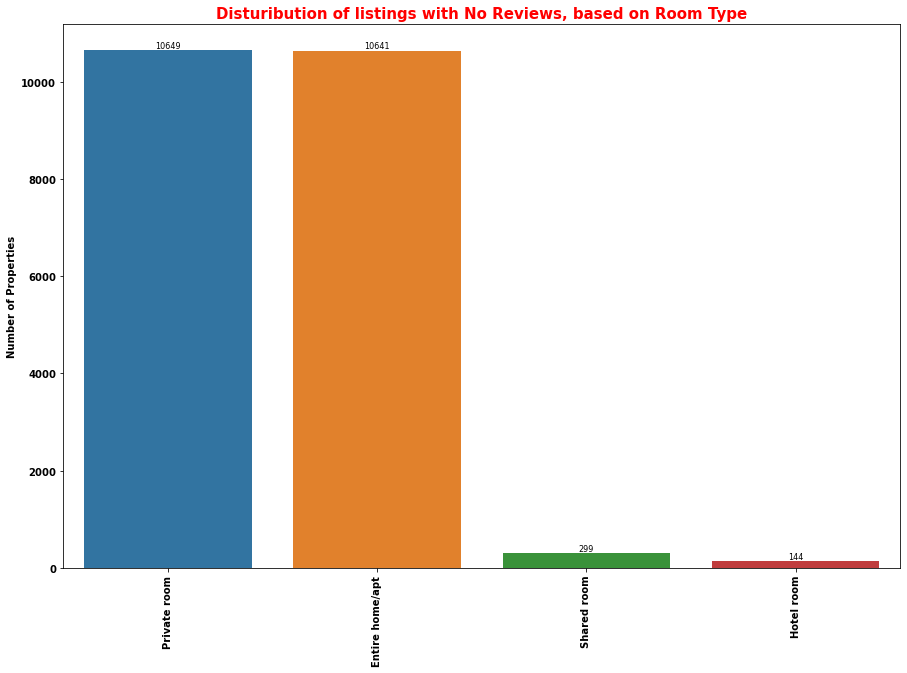

In [67]:
#Barplot of Borough 

plt.figure(figsize=(15,10)),

ax = sns.barplot(x='room_type', y="count", data=rm__count)
plt.title("Disturibution of listings with No Reviews, based on Room Type", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of Properties",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=8)

plt.show()

In [36]:
#Let's look at listing with prices 4x std deviation as they were termed as our outliers.

df_3_high = df_3[df_3.price>378]
df_3_high #there are 869 listings, which is 869/21733 = 0.04 = 4%

,id,property_type,price,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,last_review,first_review
32177,21965077,Entire apartment,999.0,Tower Hamlets,Entire home/apt,1,1.0,3.0,NaN,NaN
70573,43541085,Private room in apartment,999.0,Islington,Private room,6,NaN,12.0,NaN,NaN
38626,25932168,Room in boutique hotel,999.0,Kensington and Chelsea,Hotel room,2,1.0,2.0,NaN,NaN
48481,32327505,Entire house,995.0,Kensington and Chelsea,Entire home/apt,8,4.0,4.0,NaN,NaN
41640,27775083,Entire serviced apartment,992.0,Kensington and Chelsea,Entire home/apt,7,3.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
28482,20294969,Entire apartment,380.0,Kensington and Chelsea,Entire home/apt,5,2.0,3.0,NaN,NaN
50947,33868063,Entire house,380.0,Hammersmith and Fulham,Entire home/apt,8,4.0,4.0,NaN,NaN
59194,38360813,Entire condominium,380.0,Kensington and Chelsea,Entire home/apt,6,3.0,3.0,NaN,NaN
37623,25174484,Private room in apartment,380.0,Hackney,Private room,1,1.0,1.0,NaN,NaN


In [47]:
#Let's look at listings with prices greater than 1x std deviation
# (mean)100.047971 + (std)94.793524 =194.841495

df_3_std = df_3[df_3.price>194]
df_3_std #there are 3346 listings.

,id,property_type,price,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,last_review,first_review
32177,21965077,Entire apartment,999.0,Tower Hamlets,Entire home/apt,1,1.0,3.0,NaN,NaN
70573,43541085,Private room in apartment,999.0,Islington,Private room,6,NaN,12.0,NaN,NaN
38626,25932168,Room in boutique hotel,999.0,Kensington and Chelsea,Hotel room,2,1.0,2.0,NaN,NaN
48481,32327505,Entire house,995.0,Kensington and Chelsea,Entire home/apt,8,4.0,4.0,NaN,NaN
41640,27775083,Entire serviced apartment,992.0,Kensington and Chelsea,Entire home/apt,7,3.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
11311,9437886,Entire house,195.0,Brent,Entire home/apt,5,3.0,4.0,NaN,NaN
29416,20799841,Entire house,195.0,Newham,Entire home/apt,7,4.0,4.0,NaN,NaN
65045,40965766,Entire apartment,195.0,Wandsworth,Entire home/apt,4,2.0,2.0,NaN,NaN
62774,40085129,Entire serviced apartment,195.0,Hackney,Entire home/apt,4,2.0,2.0,NaN,NaN


In [37]:
#Let's look at listing with prices less than 1x std deviation 

df_3_low = df_3[df_3.price<5.26]
df_3_low #there are 193 listings.

,id,property_type,price,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,last_review,first_review
39248,26317162,Entire apartment,5.0,Westminster,Entire home/apt,4,2.0,2.0,NaN,NaN
69535,42949867,Entire house,5.0,Westminster,Entire home/apt,12,6.0,0.0,NaN,NaN
3276,2814755,Entire apartment,5.0,Haringey,Entire home/apt,2,NaN,1.0,NaN,NaN
36586,24521822,Entire villa,5.0,Westminster,Entire home/apt,8,4.0,4.0,NaN,NaN
54533,35954032,Private room in house,5.0,Islington,Private room,1,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
76416,46060845,Private room in condominium,0.0,Hackney,Private room,1,1.0,1.0,NaN,NaN
75001,45589684,Private room in condominium,0.0,Hackney,Private room,1,1.0,1.0,NaN,NaN
67251,42065766,Room in serviced apartment,0.0,Kensington and Chelsea,Hotel room,4,NaN,NaN,NaN,NaN
73623,45148705,Private room in condominium,0.0,Tower Hamlets,Private room,1,1.0,1.0,NaN,NaN


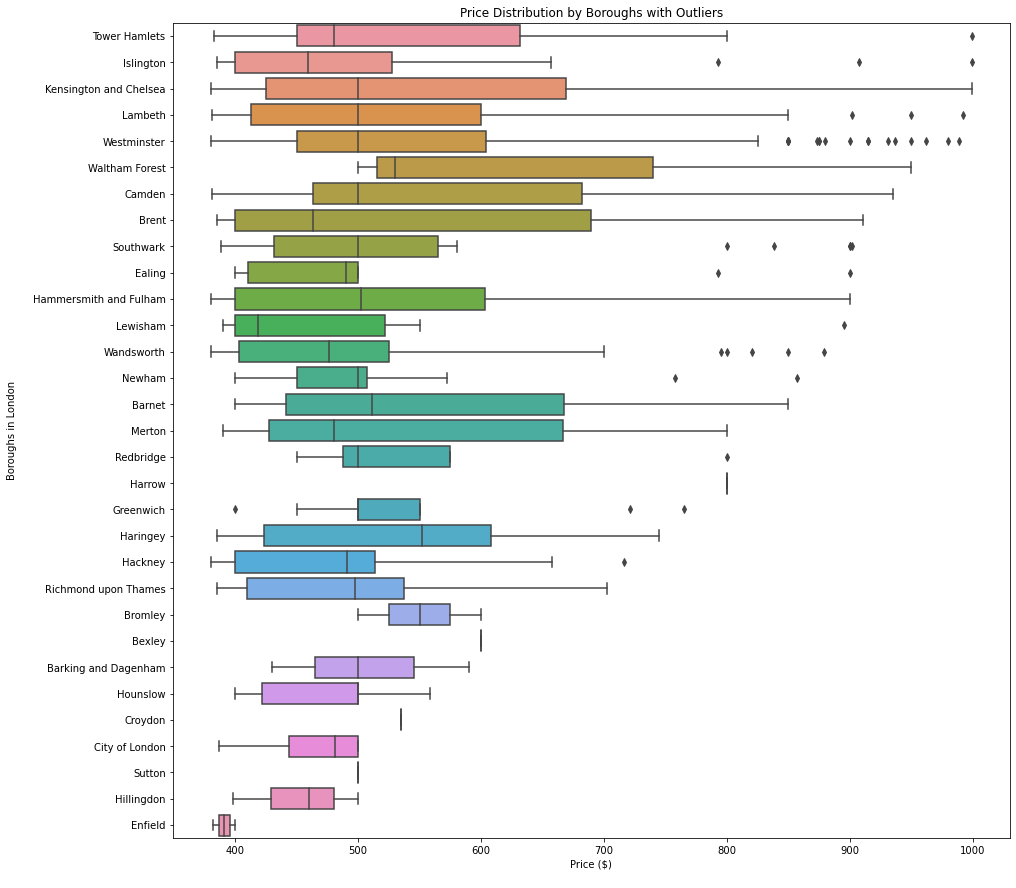

In [42]:
# Plot price Distribution by Borough
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(x='price', y='neighbourhood_cleansed',  
            data=df_3_high, orient='h', ax=ax).set(xlabel='Price (£)\n', ylabel='Boroughs in London\n')
ax.set_title('Price Distribution by Boroughs with Outliers')
plt.show()

In [38]:
#Let's look at the price distribution of those without reviews.
#4x std deviation first
borough_high_price = df_3_high.groupby("neighbourhood_cleansed").price.mean().sort_values(ascending=False)
borough_high_price = borough_high_price.reset_index()
borough_high_price.head(50)

,neighbourhood_cleansed,price
0,Harrow,800.000000
1,Waltham Forest,660.000000
2,Bexley,600.000000
3,Camden,566.390625
4,Barnet,563.750000
5,Redbridge,562.500000
6,Kensington and Chelsea,561.325843
7,Lambeth,555.448276
8,Westminster,554.581197
9,Southwark,553.583333


In [39]:
borough__count = df_3_high.groupby("neighbourhood_cleansed").id.count().sort_values(ascending=False)
borough__count = borough__count.reset_index()
borough__count.rename(columns={"id":"count"}, inplace=True)
borough__count["percentage"]=round(borough__count["count"]/borough__count["count"].sum()*100,2)
borough__count.head(80)


,neighbourhood_cleansed,count,percentage
0,Westminster,234,26.93
1,Kensington and Chelsea,178,20.48
2,Camden,64,7.36
3,Wandsworth,53,6.10
4,Hammersmith and Fulham,39,4.49
5,Tower Hamlets,31,3.57
6,Brent,30,3.45
7,Lambeth,29,3.34
8,Southwark,24,2.76
9,Islington,24,2.76


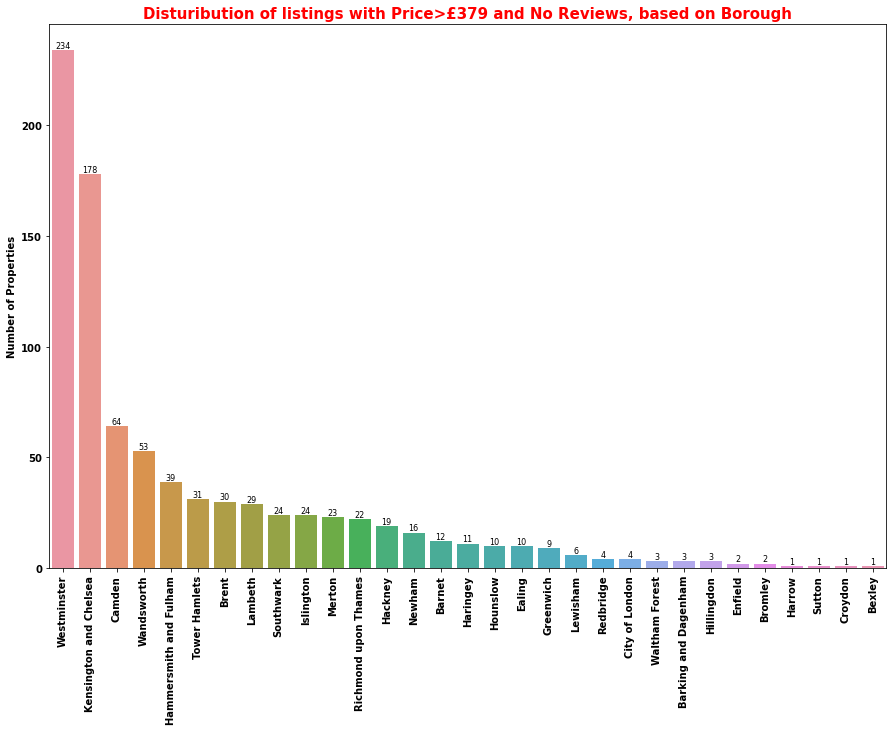

In [41]:
#Barplot of Borough 

plt.figure(figsize=(15,10)),

ax = sns.barplot(x="neighbourhood_cleansed", y="count", data=borough__count)
plt.title("Disturibution of listings with Price>£379 and No Reviews, based on Borough", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of Properties",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=8)

plt.show()

In [44]:
borough__low_price = df_3_low.groupby("neighbourhood_cleansed").price.mean().sort_values(ascending=False)
borough__low_price = borough__low_price.reset_index()
borough__low_price.head(50)


,neighbourhood_cleansed,price
0,Haringey,3.666667
1,Kingston upon Thames,3.000000
2,Newham,2.000000
3,Islington,2.000000
4,Lewisham,1.500000
5,Westminster,1.396226
6,Waltham Forest,1.333333
7,Camden,1.272727
8,Richmond upon Thames,1.250000
9,Hammersmith and Fulham,1.100000


In [45]:
borough_low_count = df_3_low.groupby("neighbourhood_cleansed").id.count().sort_values(ascending=False)
borough_low_count = borough_low_count.reset_index()
borough_low_count.rename(columns={"id":"count"}, inplace=True)
borough_low_count["percentage"]=round(borough_low_count["count"]/borough_low_count["count"].sum()*100,2)
borough_low_count.head(80)

,neighbourhood_cleansed,count,percentage
0,Westminster,53,27.46
1,Kensington and Chelsea,34,17.62
2,Ealing,12,6.22
3,Camden,11,5.70
4,Hammersmith and Fulham,10,5.18
5,Southwark,10,5.18
6,Tower Hamlets,9,4.66
7,Hackney,9,4.66
8,Sutton,5,2.59
9,Barnet,5,2.59


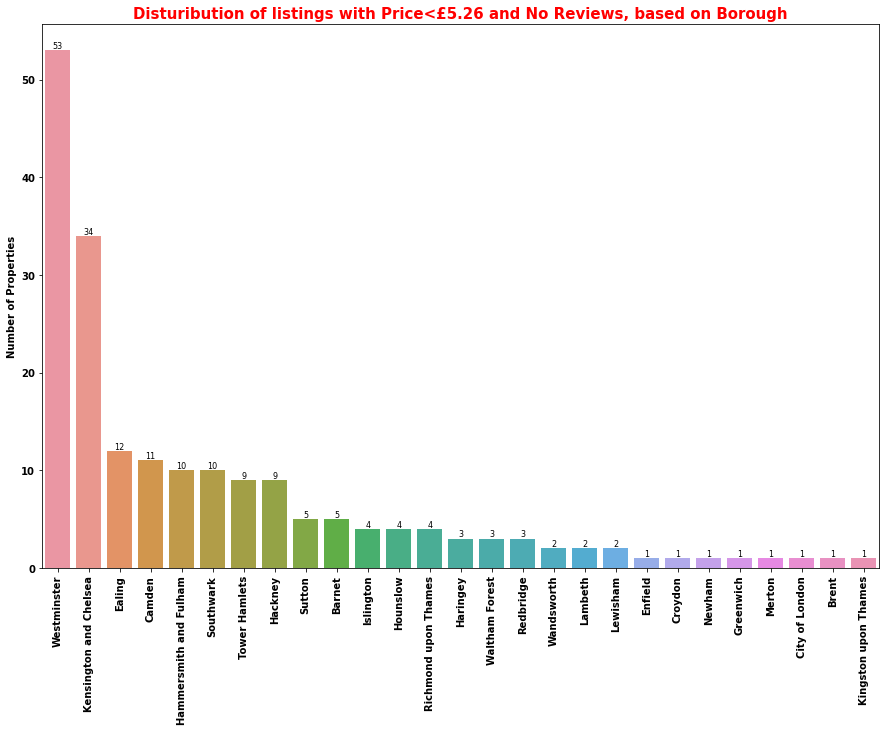

In [46]:
#Barplot of Borough 

plt.figure(figsize=(15,10)),

ax = sns.barplot(x="neighbourhood_cleansed", y="count", data=borough_low_count)
plt.title("Disturibution of listings with Price<£5.26 and No Reviews, based on Borough", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of Properties",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=8)

plt.show()

28.23% of the listings on Airbnb had no bookings and Fig. 5 shows the price distribution by borough for listings without reviews. Westminster has the highest number of listings without reviews among the boroughs at 12.13% and private room for room type at 49%. 
The average price for listings in this group is £13.91 more than the overall average at £113.96. Our findings show that only 4% of these listings had price greater than four times standard variation. 


# 4.Could pricing be the reason for the above listings not getting any booking?<a class="anchor" id="q4"></a>

the average price of the listings without bookings is higher than the overall average, only 4% are in the outliers category for price. Therefore, we are not able to conclude from our findings whether pricing is the reason for the listings not getting booked. 
It would appear that other factors might influence the listings not getting booked.


# 5.What is a good machine learning model for predicting the price of an Airbnb listing?<a class="anchor" id="q5"></a>

Based on our evaluation of the models we had selected, Neural Networks has the highest accuracy of all the models we studied, and would be a good machine learning model to predict pricing of Airbnb listings. 